# Cvičení
Pracuj se souborem wine-regions.csv. Každý záznam obsahuje informace o vzorku vína. Všechny vzorky pocházejí z jednoho regionu v Itálii, ale v datech se nachází několik různých odrůd. Naší úlohou bude data uspořádat do shluků, které by mohly odpovídat odrůdám.

In [2]:
import pandas
import requests

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [6]:
datasets_url = (
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets"
)

r = requests.get(f"{datasets_url}/wine-regions.csv")
open("wine-regions.csv", "wb").write(r.content)

wine_regions_df = pandas.read_csv("wine-regions.csv")
wine_regions_df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dejme tomu, že víme, že vzorky pocházejí ze tří odrůd, ale ztratili jsme informaci o tom, který vzorek je odkud. Máme tedy počet clusterů = 3.

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(wine_regions_df)

Zkus nejprve spustit algoritmus K-means bez redukce dimenzionality (tj. bez kroku t-SNE). Jak vypadají výsledky?

In [10]:
model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(X)

In [14]:
silhouette_score(X, labels)

0.57269365

Doplň krok redukce dimenzionality. Nyní si můžeš data i vykreslit. Poznali bychom z grafu, že se jedná o tři shluky? Možná bychom tuto informaci o počtu shluků předem ani nemuseli znát (a typicky jí neznáme).

In [12]:
tsne = TSNE(
    init="pca",
    n_components=2,
    perplexity=10,
    learning_rate="auto",
    random_state=0,
)

X = tsne.fit_transform(X)
X.shape

/Users/hedvikapajerova/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(178, 2)

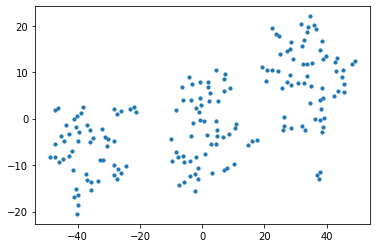

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=10)

Odpověď: Ano, poznali bychom, že se jedná o tři shluky.

In [17]:
model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(X)

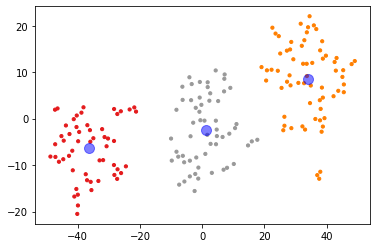

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=100, alpha=0.5)

In [19]:
silhouette_score(X, labels)

0.62408817

Jak se liší Silhouette koeficient mezi variantami bez t-SNE a s t-SNE?

Odpověď: Silhouette koeficient je větší (vychází lépe) s použitím redukce dimenzionality.